In [193]:


import pandas as pd
import numpy as np
import seaborn as sns
import math
import operator
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb 
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score

In [120]:

dfTest=pd.read_csv(urlT, index_col=0)
dfTest.head()


,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate
9,322460.0,2.088892e+07,1.054769e+07,NaN,0.846584,51.919416,low,2.569961,NaN,NaN,less than 1 per person,84 per 1000 people,1849926.0,very low access,[0%-25%)
16,513120.0,2.220651e+07,1.641032e+07,453550.0,42.139810,5.803190,low,2.184886,NaN,NaN,more than 1 per person,289 per 1000 people,17983312.0,very high access,[0%-25%)
19,18580.0,1.872230e+05,8.527691e+05,NaN,1.699056,67.396944,unknown,NaN,NaN,NaN,less than 1 per person,66 per 100 people,240458015.0,very high access,unknown
23,112490.0,3.252347e+06,4.857911e+06,20000.0,48.602426,4.934574,low,NaN,0.430158,NaN,less than 1 per person,178 per 1000 people,9427882.0,high access,[0%-25%)
28,783560.0,3.911844e+07,1.171853e+07,612800.0,43.734006,28.635994,medium low,NaN,0.624424,NaN,less than 1 per person,46 per 100 people,50379814.0,very high access,[0%-25%)


In [121]:
dfTr=pd.read_csv(urlTr, index_col=0)
dfTr.head()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
0,120540.0,2.632839e+06,5.417843e+06,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195
1,752610.0,2.403039e+07,4.957554e+07,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366
2,1396.0,3.000000e+03,8.000000e+01,NaN,18.390090,23.139910,unknown,NaN,NaN,NaN,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000
3,2758812.0,1.228845e+08,1.050943e+08,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197
4,340.0,1.100000e+04,1.699000e+04,NaN,5.311885,30.271115,unknown,-0.044229,NaN,NaN,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561


<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 461
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   surface_area                   362 non-null    float64
 1   agricultural_land              358 non-null    float64
 2   forest_area                    357 non-null    float64
 3   armed_forces_total             318 non-null    float64
 4   urban_pop_major_cities         360 non-null    float64
 5   urban_pop_minor_cities         360 non-null    float64
 6   national_income                362 non-null    object 
 7   inflation_annual               146 non-null    float64
 8   inflation_monthly              156 non-null    float64
 9   inflation_weekly               20 non-null     float64
 10  mobile_subscriptions           362 non-null    object 
 11  internet_users                 362 non-null    object 
 12  secure_internet_servers_total  352 non-null    flo

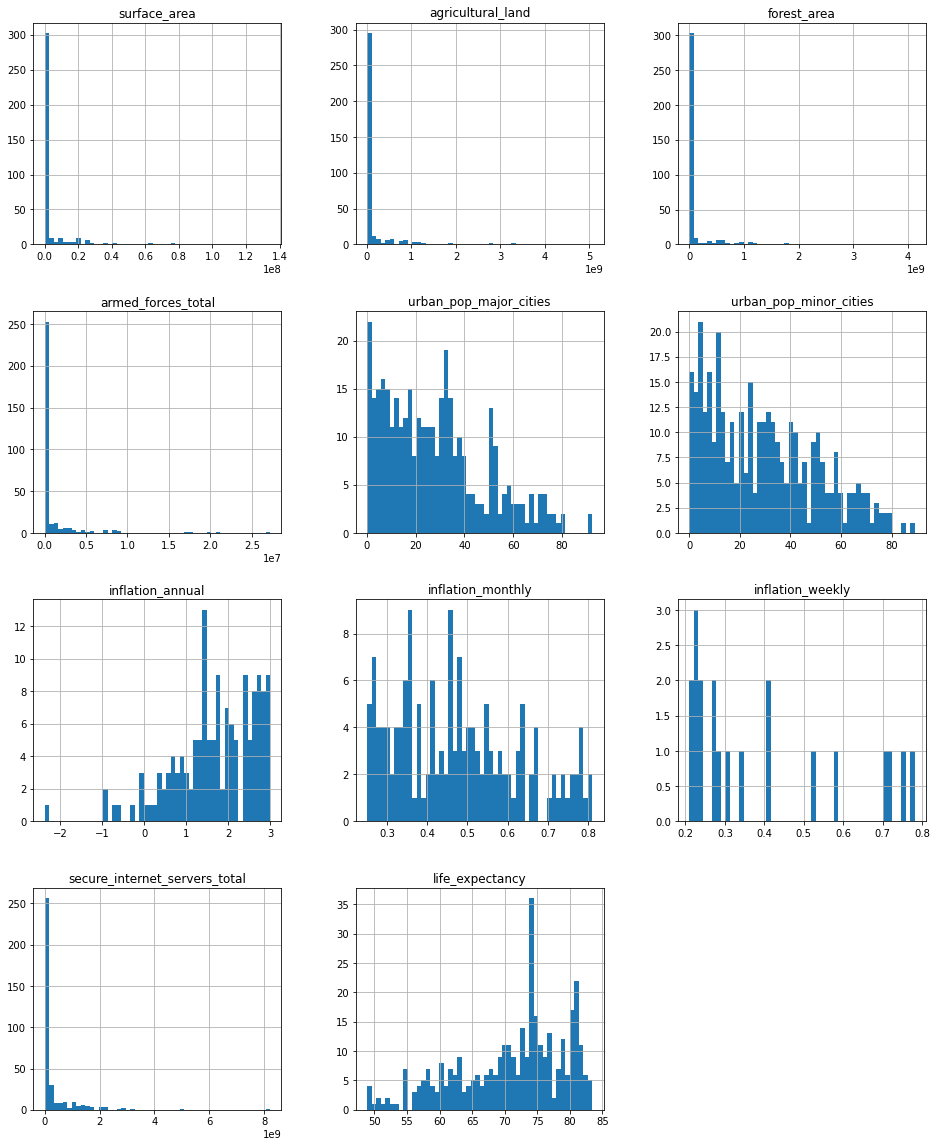

In [24]:
#EDA1: Basic Visulization : 
dfTr.columns
dfTr.info()
#dfTr.describe #dfTr['life_expectancy'].describe()

#visulize EDA:
#plt.figure(figsize=9,8)
#sns.distplot(home_data['SalePrice'],color='g', bins=100, hist_kws={'alpha':0.4});
dfTrV=dfTr.select_dtypes(include=['float64','int64'])
dfTrV.head()
dfTrV.hist(figsize=(16,20),bins=50);


In [122]:
#EDA1-1: Mistake Data
dfTr.describe()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,inflation_annual,inflation_monthly,inflation_weekly,secure_internet_servers_total,life_expectancy
count,3.620000e+02,3.580000e+02,3.570000e+02,3.180000e+02,360.000000,360.000000,146.000000,156.000000,20.000000,3.520000e+02,362.000000
mean,4.021884e+06,1.594881e+08,1.204151e+08,9.849864e+05,27.659456,29.175242,1.681539,0.475969,0.396478,2.949654e+08,71.059691
std,1.234491e+07,4.964143e+08,3.796623e+08,2.994686e+06,20.512885,21.206494,0.980308,0.153430,0.203583,7.234006e+08,8.332818
min,3.030000e+01,3.000000e+02,0.000000e+00,5.000000e+01,0.091444,0.074575,-2.372263,0.250543,0.209993,4.002500e+04,48.850634
25%,2.783000e+04,1.054198e+06,4.951445e+05,1.218000e+04,10.624625,11.013743,1.202953,0.347799,0.232118,3.468446e+06,65.469854
50%,2.037745e+05,5.360256e+06,3.928535e+06,5.352500e+04,24.459439,26.735127,1.762683,0.459790,0.297938,2.671228e+07,73.238024
75%,1.081610e+06,4.221935e+07,2.241297e+07,2.598000e+05,38.587177,43.499418,2.485675,0.577340,0.537541,2.173937e+08,77.125610
max,1.343253e+08,5.067600e+09,4.132117e+09,2.720662e+07,92.409069,89.142904,2.997694,0.810152,0.781527,8.207343e+09,83.480488


Discriptive statistic indicates that in general "surface_area" 
values (total area of lands) are smaller than "argicultural_land" 
and "forst_area" values (argicultural and forest portions of the total area). 
It seems there is data entry problem. Following analysese are preformed to address this issue.

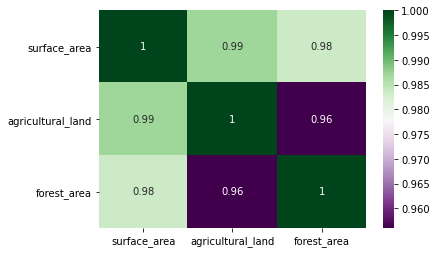

In [123]:
#EDA1-1: After Eyebow, Error of the data
# Check if these three variables are highly correlated (multicollinearity problem)
sns.heatmap(dfTr[['surface_area', 'agricultural_land','forest_area']].corr(),
            cmap='PRGn',annot=True);


There are strong linear relashionships among 'surface_area', 'agricultural_land', and 'forest_area'. Therefore, having these three variables altogether will not help (provide additional information) future prediction. To resolve this problem the following steps are taken:
1) Multiply 'surface_area' by 100 (to fix data entry/unit issue).
2) Create two new features (colums) namely 'agricultural_portion' and 'forest_portion' by dividing 'agricultural_land' and 'forest_area' by 'surface_area' respectively.
3) Remove 'agricultural_land' and 'forest_area' colums from dataset.

In [124]:
#EDA1-1: Mistake Data
# make a copy of the orginal dataframe
df1 = dfTr.copy()

# Step 1: Multiply 'surface_area' by 100
df1['surface_area'] = df1['surface_area'] * 100

# Step 2: Creates new variables 
df1['agricultural_portion'] = df1['agricultural_land'] / df1['surface_area'] 
df1['forest_portion'] = df1['forest_area'] / df1['surface_area']

# Step 3: Remove 'agricultural_land' and 'forest_area' colums from dataset
df1.drop(['agricultural_land', 'forest_area'], axis=1, inplace=True)

# Show the first 10 row of df1
df1.head(10)

,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy,agricultural_portion,forest_portion
0,1.205400e+07,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195,0.218420,0.449464
1,7.526100e+07,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366,0.319294,0.658715
2,1.396000e+05,NaN,18.390090,23.139910,unknown,NaN,NaN,NaN,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000,0.021490,0.000573
3,2.758812e+08,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197,0.445426,0.380940
4,3.400000e+04,NaN,5.311885,30.271115,unknown,-0.044229,NaN,NaN,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561,0.323529,0.499706
5,7.835600e+07,612800.0,37.699524,34.134476,medium low,NaN,0.740964,NaN,less than 1 per person,45 per 100 people,1.166004e+08,very high access,[0%-25%),74.862439,0.499032,0.148224
6,2.846040e+09,5032780.0,32.853558,37.469387,medium high,2.773339,NaN,NaN,more than 1 per person,64 per 100 people,4.702241e+08,very high access,[0%-25%),76.569368,0.294847,0.379839
7,5.490910e+07,325600.0,24.582761,54.237239,high,1.955685,NaN,NaN,less than 1 per person,81 per 100 people,4.093085e+08,very high access,[25%-50%),81.968293,0.526820,0.304076
8,3.571700e+07,186450.0,18.091168,56.596832,high,2.008491,NaN,NaN,more than 1 per person,82 per 100 people,1.110775e+09,very high access,[25%-50%),80.892683,0.478109,0.327452
10,7.160000e+04,147600.0,51.288344,48.711656,unknown,NaN,0.377388,NaN,more than 1 per person,72 per 100 people,6.353061e+08,very high access,[0%-25%),81.995122,0.010340,0.231586


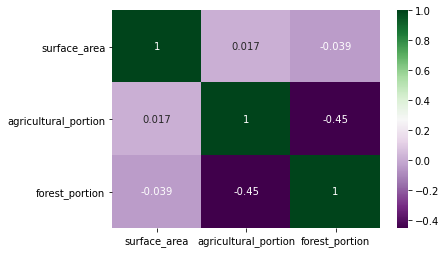

In [125]:

# Check correlations among 'surface_area', 'agriculture_portion' & 'forest_portion' for multicollinearity
sns.heatmap(df1[['surface_area', 'agricultural_portion','forest_portion']].corr(),
            cmap='PRGn',annot=True);

In [134]:
#EDA1-2: Null Data Mistake Data ..Annual, Monthly, Weekly
df1.isnull().sum().sort_values(ascending=False)

armed_forces_total               44
inflation_annual                 40
secure_internet_servers_total    10
forest_portion                    5
agricultural_portion              4
urban_pop_minor_cities            2
urban_pop_major_cities            2
life_expectancy                   0
women_parliament_seats_rate       0
improved_sanitation               0
internet_users                    0
mobile_subscriptions              0
national_income                   0
surface_area                      0
dtype: int64

In [133]:
#EDA1-2: Redundant Data..Annual, Monthly, Weekly
#The variable description indicates 'inflation_annual', 'inflation_monthly', and 'inflarion_weekly' are linearly dependent.
len(df1[(df1['inflation_annual'].isnull()) & (df1['inflation_monthly'].isnull()) & (df1['inflation_weekly'].isnull())])

for i in df1.index:
    if np.isnan(df1.loc[i, 'inflation_annual']):
        if np.isnan(df1.loc[i, 'inflation_monthly']):
            df1.loc[i, 'inflation_annual'] = 52 * df1.loc[i, 'inflation_weekly']
        else:
            df1.loc[i, 'inflation_annual'] = 12 * df1.loc[i, 'inflation_monthly']

# Remove columns 'inflation_monthly' & 'inflation_weekly'
df1.drop(['inflation_monthly', 'inflation_weekly'], axis=1, inplace=True)

KeyError: 'inflation_monthly'

In [142]:
#Preprocessing Step1-1: Handling categoricaldata (If there's any categ,Null imputation will have error)- short = labelcode, long=?
print(dfTest.info())
cat_dfTr=dfTr.select_dtypes(include=['object']).copy()
cat_dfTr.head()
dfTr['mobile_subscriptions'].value_counts()

# Decide which categorical variables you want to use in model
for col_name in df1.columns:
    if df1[col_name].dtypes == 'object':
        unique_cat = len(df1[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 9 to 455
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   surface_area                   100 non-null    float64
 1   agricultural_land              100 non-null    float64
 2   forest_area                    100 non-null    float64
 3   armed_forces_total             100 non-null    float64
 4   urban_pop_major_cities         100 non-null    float64
 5   urban_pop_minor_cities         100 non-null    float64
 6   national_income                100 non-null    object 
 7   inflation_annual               100 non-null    float64
 8   inflation_monthly              100 non-null    float64
 9   inflation_weekly               100 non-null    float64
 10  mobile_subscriptions           100 non-null    object 
 11  internet_users                 100 non-null    object 
 12  secure_internet_servers_total  100 non-null    flo

In [152]:
#Preprocessing Step1-2: Handling categoricaldata 
variable_split = df1['internet_users'].str.split()
df1['percent_internet_users'] = (pd.to_numeric(variable_split.str.get(0), errors='coerce') / 
                          pd.to_numeric(variable_split.str.get(2), errors='coerce'))
# Remove 'internet_users' column
df1.drop('internet_users', axis=1, inplace=True)
df1.head()

,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,mobile_subscriptions,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy,agricultural_portion,forest_portion,percent_internet_users
0,12054000.0,1379000.0,55.747169,4.688831,unknown,NaN,less than 1 per person,NaN,high access,[0%-25%),69.494195,0.218420,0.449464,0.000
1,75261000.0,16500.0,16.890687,23.136313,very low,6.977676,less than 1 per person,2.623624e+06,low access,[0%-25%),59.237366,0.319294,0.658715,0.154
2,139600.0,NaN,18.390090,23.139910,unknown,NaN,more than 1 per person,1.656589e+09,no info,unknown,81.300000,0.021490,0.000573,0.900
3,275881200.0,1518650.0,50.966885,24.522427,high,1.374906,more than 1 per person,6.625072e+08,very high access,[25%-50%),81.373197,0.445426,0.380940,0.760
4,34000.0,NaN,5.311885,30.271115,unknown,-0.044229,more than 1 per person,2.832808e+07,very high access,[25%-50%),73.193561,0.323529,0.499706,0.350


In [153]:
#Preprocessing Step1-3:Others use labels Details here
for name in df1.select_dtypes(include=['object']):
    print(name,':')
    print(df1[name].value_counts(),'\n')

national_income :
low            81
very low       77
medium low     76
unknown        48
high           37
medium high    31
very high      12
Name: national_income, dtype: int64 

mobile_subscriptions :
more than 1 per person    188
less than 1 per person    164
unknown                     7
more than 2 per person      2
more than 3 per person      1
Name: mobile_subscriptions, dtype: int64 

improved_sanitation :
very high access    155
low access           55
medium access        54
high access          47
very low access      33
no info              18
Name: improved_sanitation, dtype: int64 

women_parliament_seats_rate :
[0%-25%)     249
[25%-50%)     82
unknown       30
[50%-75%)      1
Name: women_parliament_seats_rate, dtype: int64 



In [154]:
#Preprocessing Step1-4:Individual Change
# less than 1 per person, otherwise 2:
df1['mobile_subscriptions'] = [1 if x == 'less than 1 per person' else 2 for x in dfTr['mobile_subscriptions']]

In [157]:
#Preprocessing Step1-4:Individual Change
df1['women_parliament_seats_rate'] = (
    df1['women_parliament_seats_rate'].replace('[0%-25%)', 1))
df1['women_parliament_seats_rate'] = (
    df1['women_parliament_seats_rate'].replace('[25%-50%)', 2))
df1['women_parliament_seats_rate'] = (
    df1['women_parliament_seats_rate'].replace('[50%-75%)', 2))
df1['women_parliament_seats_rate'] = (
    df1['women_parliament_seats_rate'].replace('unknown', 3))

In [158]:
#Preprocessing Step1-4:Individual Change
#Assign numeric values to the levels of "national_income" (ordinal variable):
mapper_1 = {'very low': 1, 'medium low': 2, 'low': 3,
            'medium high': 4, 'high': 5, 'very high': 6,
            'unknown': 7}
df1['national_income'].replace(mapper_1, inplace=True)

In [159]:
#Preprocessing Step1-4:Individual Change
# Assign numeric values to the levels of "improved_sanitation" (Ordinal Variable):
mapper_2 = {'very low access': 1, 'low access': 2, 'medium access': 3,
            'high access': 4, 'very high access': 5, 'no info': 6}
df1['improved_sanitation'].replace(mapper_2, inplace=True)

In [78]:
#Preprocessing Step1: Handling categoricaldata Another quick way
# Apply LabelEncoder to each column with categorical data

class_le = LabelEncoder()
#fTr[object_cols] =class_le.fit_transform(dfTr[object_cols].values)
#fTest[object_cols] =class_le.fit_transform(dfTest[object_cols].values)

for col in dfTr.columns:
    if dfTr[col].dtype=='object':
        dfTr[col]=class_le.fit_transform(dfTr[col])
for col in dfTest.columns:
    if dfTest[col].dtype=='object':
        dfTest[col]=class_le.fit_transform(dfTest[col])
dfTest.tail(20)

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate
354,29.9,1.594881e+08,1.204151e+08,9.849864e+05,41.125543,58.874457,4,1.681539,0.508786,0.396478,2,53,2.949654e+08,3,3
365,17098250.0,2.237918e+08,8.509556e+08,1.364000e+06,65.758175,8.027825,3,1.681539,0.422310,0.396478,1,56,3.903586e+07,2,0
373,390.0,1.000000e+04,2.700000e+04,9.849864e+05,25.198021,24.296979,3,2.598444,0.475969,0.396478,1,43,1.920720e+08,3,0
383,12190.0,1.870000e+05,4.400000e+05,9.849864e+05,20.198399,5.001601,1,1.363636,0.475969,0.396478,0,0,1.292940e+08,2,0
385,134325123.8,5.075504e+09,4.135538e+09,2.815437e+07,23.934474,28.514332,3,1.681539,0.309406,0.396478,0,30,1.807117e+08,2,0
387,2381740.0,4.143164e+07,1.940800e+06,3.172000e+05,66.693665,2.816335,1,1.681539,0.271140,0.396478,1,16,1.571251e+06,0,1
396,581730.0,2.655882e+07,1.133672e+07,1.050000e+04,34.411392,22.526608,3,1.681539,0.490324,0.396478,1,9,9.648474e+06,2,0
399,1134886.0,5.376600e+07,3.854798e+07,5.158600e+05,42.990810,19.206830,3,1.434727,0.475969,0.396478,1,55,2.739656e+08,4,0
406,4383492.0,1.927508e+08,1.658450e+08,2.164550e+06,40.414526,33.949259,0,1.387690,0.475969,0.396478,1,65,6.892103e+08,4,1
408,69700.0,2.559110e+06,2.830929e+06,3.235000e+04,39.288767,14.020233,1,-0.512052,0.475969,0.396478,1,37,2.874844e+07,0,0


In [174]:
#Preprocessing Step2-1: Preprocessing Null Data 
#After this It's ready to 
#Step3: prepare the test set as training set, Step4: Build the model, Step5: Predict Test, Step 5: accurate rate
df1.isnull().sum().sort_values(ascending=False)
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df1)
df2 = pd.DataFrame(data=imp.transform(df1) , columns=df1.columns)
df2.count()
df2.tail()



,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,mobile_subscriptions,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy,agricultural_portion,forest_portion,percent_internet_users
357,24361000.0,159150.0,42.818424,39.273576,5.0,2.554547,2.0,1.193275e+09,5.0,1.0,80.956098,0.713024,0.128550,0.90
358,983151000.0,1433150.0,22.948363,58.328637,6.0,1.464833,2.0,1.304449e+09,5.0,1.0,78.841463,0.443226,0.338396,0.84
359,17622000.0,25450.0,92.409069,2.573931,4.0,8.575135,2.0,7.511805e+07,5.0,1.0,76.836195,0.820649,0.102818,0.58
360,33097200.0,522000.0,27.411815,4.897185,3.0,6.592256,2.0,8.159726e+06,3.0,1.0,75.756488,0.350685,0.468120,0.44
361,35000.0,53525.0,32.291719,62.772281,7.0,3.371067,2.0,4.010044e+08,5.0,3.0,79.624390,0.114286,0.509143,0.45


In [176]:
#Preprocessing Step2-2: Scale the feature values to a uniform range.
#Preprocessing Step3:Scale the feature values to a uniform range.
#from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(df2.iloc[:,:-1])
rescaledX_train.tail()

AttributeError: 'numpy.ndarray' object has no attribute 'tail'

In [178]:
#Step3: prepare the test set as training set

# Create a copy of test dataframe
tdf = dfTest.copy()

# Step 1: Multiply 'surface_area' by 100
tdf['surface_area'] = tdf['surface_area'] * 100

# Step 2: Creates new variables 
tdf['agricultural_portion'] = tdf['agricultural_land'] / tdf['surface_area'] 
tdf['forest_portion'] = tdf['forest_area'] / tdf['surface_area']

# Step 3: Remove 'agricultural_land' and 'forest_area' colums from dataset
tdf.drop(['agricultural_land', 'forest_area'], axis=1, inplace=True)

# Step 4: Replace missing values in column 'inflation_annual' with information from
# columns 'inflation_monthly' & 'inflation_weekly'

for i in tdf.index:
    if np.isnan(tdf.loc[i, 'inflation_annual']):
        if np.isnan(tdf.loc[i, 'inflation_monthly']):
            tdf.loc[i, 'inflation_annual'] = 52 * tdf.loc[i, 'inflation_weekly']
        else:
            tdf.loc[i, 'inflation_annual'] = 12 * tdf.loc[i, 'inflation_monthly']

# Step5: Remove columns 'inflation_monthly' & 'inflation_weekly'
tdf.drop(['inflation_monthly', 'inflation_weekly'], axis=1, inplace=True)
# Step6: Convert 'internet_users' column to associated percentages
variable_split = tdf['internet_users'].str.split()
tdf['percent_internet_users'] = (pd.to_numeric(variable_split.str.get(0), errors='coerce') / 
                          pd.to_numeric(variable_split.str.get(2), errors='coerce'))

# Step 7: Remove 'internet_users' column
tdf.drop('internet_users', axis=1, inplace=True)

# Step 8: Assign "mobile_subscriptions" values to 1 if mobile subscriptions is
# less than 1 per person, otherwise 2:
tdf['mobile_subscriptions'] = [1 if x == 'less than 1 per person' else 2 for x in tdf['mobile_subscriptions']]

# Step 9: Assign "women_parliament_seats_rate" to 1 if women _parliament seat _rate is
# [0%-25%), 2 if it is [25%-75%), or 3 if unknown:

tdf['women_parliament_seats_rate'] = (
    tdf['women_parliament_seats_rate'].replace('[0%-25%)', 1))
tdf['women_parliament_seats_rate'] = (
    tdf['women_parliament_seats_rate'].replace('[25%-50%)', 2))
tdf['women_parliament_seats_rate'] = (
    tdf['women_parliament_seats_rate'].replace('[50%-75%)', 2))
tdf['women_parliament_seats_rate'] = (
    tdf['women_parliament_seats_rate'].replace('unknown', 3))

# Step 10: Assign numeric values to the levels of "national_income" (ordinal variable):
mapper_1 = {'very low': 1, 'medium low': 2, 'low': 3,
            'medium high': 4, 'high': 5, 'very high': 6,
            'unknown': 7}
tdf['national_income'].replace(mapper_1, inplace=True)
# Step 11: Assign numeric values to the levels of "improved_sanitation" (Ordinal Variable):
mapper_2 = {'very low access': 1, 'low access': 2, 'medium access': 3,
            'high access': 4, 'very high access': 5, 'no info': 6}
tdf['improved_sanitation'].replace(mapper_2, inplace=True)

# Step12: Impute missing values using Imputer in sklearn.preprocessing
imp =SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(tdf)
tdf = pd.DataFrame(data=imp.transform(tdf) , columns=tdf.columns)

# Show the first 5 rows of tdf
tdf.head()

,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,mobile_subscriptions,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,agricultural_portion,forest_portion,percent_internet_users
0,32246000.0,984986.358491,0.846584,51.919416,3.0,2.569961,1.0,1849926.0,1.0,1.0,0.647799,0.327101,0.084
1,51312000.0,453550.000000,42.139810,5.803190,3.0,2.184886,2.0,17983312.0,5.0,1.0,0.432774,0.319814,0.289
2,1858000.0,984986.358491,1.699056,67.396944,7.0,1.681539,1.0,240458015.0,5.0,3.0,0.100766,0.458972,0.660
3,11249000.0,20000.000000,48.602426,4.934574,3.0,1.681539,1.0,9427882.0,4.0,1.0,0.289123,0.431853,0.178
4,78356000.0,612800.000000,43.734006,28.635994,2.0,1.681539,1.0,50379814.0,5.0,1.0,0.499240,0.149555,0.460


In [179]:
#Step4-1: Build the model, what is X, what is y
# Create outcome and input DataFrames
y = df2['life_expectancy'] 
X = df2.drop('life_expectancy', axis=1)
y.head()

0    69.494195
1    59.237366
2    81.300000
3    81.373197
4    73.193561
Name: life_expectancy, dtype: float64

In [183]:
#Step4-2: Build the model, split test and train
# Create train and validation datasets to build the Random Forest (RF) regression 
# model and find the best set of the model parameters 

X_train, X_validation, y_train, y_validation= train_test_split(X, y,
                                                  random_state = 0)

In [186]:
#Step4-2: Build the model best feature
# Use 'Grid Search' to find the best set of RF regression parameters 
# using full dataset with criterion = 'mean absolute error' (mae) and 
# random_state = 33

n_estimators = [50, 100, 150, 200]
max_features = [4, 8, 13]
max_depth = [5, 6, 7]
min_split = [2, 3, 4] 
min_leaf = [1, 2, 3]
best_score = 100

for n in n_estimators:
    for f in max_features:
        for d in max_depth:
            for s in min_split:   
                for l in min_leaf:
                     rf = RandomForestRegressor(
                     n_estimators = n, 
                     criterion = 'mae', 
                     max_features= f,
                     random_state = 33, 
                     oob_score = False,
                     max_depth = d, min_samples_split = s, 
                     min_samples_leaf = l)
            rf.fit (X, y)    
            y_model = rf.predict(X)
            #score = mean_absolute_error(y, y_model)
            score = - np.mean(cross_val_score(rf, X, y, cv=4, scoring = 'neg_mean_absolute_error'))
            if score <= best_score:
                best_score = score
                max_n = n
                max_f = f
                max_d = d
                max_s = s
                max_l = l

print ("Number of Estimators:", max_n)               
print ("Max features:", max_f)
print ("Max Depth:", max_d)
print ("Min Split:", max_s)
print ("Min Leaf:", max_l)
print("Best Mean Absolute Error: {:.3f}".format(best_score))

Number of Estimators: 100
Max features: 8
Max Depth: 7
Min Split: 4
Min Leaf: 3
Best Mean Absolute Error: 2.626


In [199]:
#Step4-2: Build the model
# Fit a RF using best indentified parameters
rf = RandomForestRegressor(n_estimators=100, criterion = 'mae', max_features=8, random_state = 33,
                           max_depth=7, min_samples_split=4, min_samples_leaf=3)

rf.fit(X, y)

RandomForestRegressor(criterion='mae', max_depth=7, max_features=8,
                      min_samples_leaf=3, min_samples_split=4, random_state=33)

In [200]:
##Step4-3: Accuracy Score
X_train, X_validation, y_train, y_validation= train_test_split(X, y,
                                                  random_state = 0)
y_pred=rf.predict (X_validation)
rf.score(X_validation,y_validation)

0.9113765916117651

In [188]:
#Step4-3: Build the model-predict
y_test = rf.predict(tdf)
y_test

array([62.14068071, 72.4428622 , 78.11544164, 70.01594964, 74.0871603 ,
       68.68921771, 75.27621197, 66.74659831, 72.32962366, 72.63147488,
       76.37992443, 79.49147671, 59.00730311, 60.33410979, 81.50958466,
       75.31689049, 75.03555902, 75.09589272, 76.24076172, 62.23315068,
       63.46632485, 73.49870862, 73.5297882 , 77.31328512, 73.6124361 ,
       70.92535009, 58.04607383, 81.43238386, 81.06756469, 79.43610929,
       74.61804676, 62.00980823, 60.05093452, 60.83579651, 81.36166277,
       79.71044574, 76.51308789, 79.77609502, 76.20370482, 80.42969331,
       74.35154262, 68.08632938, 64.37669917, 62.56205448, 58.89593205,
       76.81904294, 68.4367764 , 64.68057708, 56.59178764, 76.90567342,
       75.79229226, 73.9530022 , 65.81402298, 81.0453804 , 56.4860914 ,
       77.96407291, 80.8821209 , 60.56710966, 73.15673487, 66.24165235,
       70.75485506, 73.46798364, 55.37037609, 71.88983462, 71.90771227,
       60.99433925, 63.18490447, 59.0702923 , 76.66040021, 65.22

In [189]:
# Plot histograms to compare distribution of actual outcomes vs. prediction 
def plot_histogram_comp(x,y):
    plt.hist(x, alpha=0.5, edgecolor='black', label='Actual')
    plt.hist(y, alpha=0.5, edgecolor='black', label='Prediction')
    plt.title("Histogram of actual outcomes v.s predicted outcomes")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper left')
    plt.show()

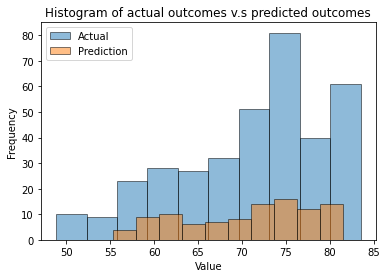

In [190]:

# Check to see if distribution of actual target values is close to the distribution
# of predicted target values
plot_histogram_comp(y,y_test)

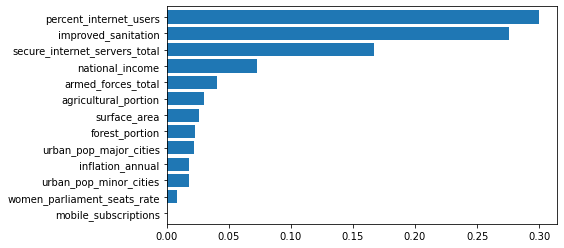

In [201]:
#Find Important Feature Visual
# Extract feature importance determined by RF model
feature_imp = pd.Series(rf.feature_importances_, index=X.columns)
feature_imp.sort_values(ascending=True, inplace=True)

# Creating a bar plot
feature_imp.plot(kind='barh', width=0.8, figsize=(7,4));

[15:31:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


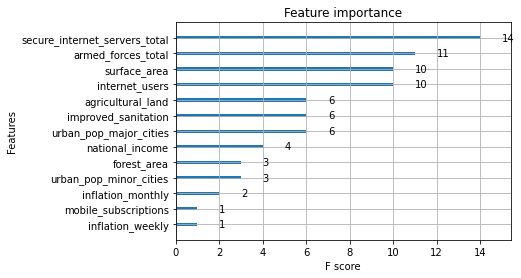

In [96]:
#Find Important Feature Visual
X=dfTr.iloc[:,:-1]
y=dfTr['life_expectancy']
#import ggplot2 as plt
#EDA What feature arae most important in my dataset
# Create the DMatrix: housing_dmatrix 
df_dmatrix = xgb.DMatrix(data=X, label=y) 

# Create the parameter dictionary: params 
params = {"objective":"reg:linear", "max_depth":4} 

# Train the model: xg_reg 
xg_reg = xgb.train(params=params, dtrain=df_dmatrix, num_boost_round=10) 

# Plot the feature importances 
xgb.plot_importance(xg_reg) 
plt.show() 

In [202]:
#Final Steps-1

# Create a submission_df
d = {'id': dfTest.index, 'life_expectancy': y_test}
submission_df = pd.DataFrame(data=d)
submission_df

,id,life_expectancy
0,9,62.140681
1,16,72.442862
2,19,78.115442
3,23,70.015950
4,28,74.087160
...,...,...
95,433,55.901219
96,441,77.125938
97,443,70.306632
98,453,67.711718


In [ ]:
#Final Steps-2
#Submission
submission_df.to_csv('submissions.csv',index=False)